## Random Sample Imputation

In [1]:
import pandas as pd
import numpy as np

In [33]:
df =  pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
#Percentage of missing data
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [40]:
def impute_nan(df, variable, median):
    df[variable + "_median"] = df[variable].fillna(median) 
    df[variable + "_random"] = df[variable]
    
    #Create the random sample to fill na 
    random_sample = df[variable].dropna().sample(df['Age'].isnull().sum(), random_state=0)
    
    #To merge, pandas need to have same index
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable + "_random"] = random_sample

In [36]:
median = df['Age'].median()

In [41]:
impute_nan(df, 'Age', median)

In [42]:
df.head()

Survived   Age     Fare  Age_median  Age_random
0         0  22.0   7.2500        22.0        22.0
1         1  38.0  71.2833        38.0        38.0
2         1  26.0   7.9250        26.0        26.0
3         1  35.0  53.1000        35.0        35.0
4         0  35.0   8.0500        35.0        35.0

In [43]:
df.loc[random_sample.index]

Survived  Age     Fare  Age_median  Age_random
5           0  NaN   8.4583        28.0       28.00
17          1  NaN  13.0000        28.0       50.00
19          1  NaN   7.2250        28.0        0.92
26          0  NaN   7.2250        28.0       36.00
28          1  NaN   7.8792        28.0       26.00
..        ...  ...      ...         ...         ...
859         0  NaN   7.2292        28.0       22.00
863         0  NaN  69.5500        28.0       25.00
868         0  NaN   9.5000        28.0       15.00
878         0  NaN   7.8958        28.0       34.00
888         0  NaN  23.4500        28.0       15.00

[177 rows x 5 columns]

##Checking the cases

In [11]:
df['Age'].dropna().sample()

447    34.0
Name: Age, dtype: float64

In [15]:
#To get 177 random samples (count of nan in Age col)
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

In [27]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
random_sample.index = df[df['Age'].isnull()].index

In [29]:
df.loc[df['Age'].isnull(), 'Fare'] = 2

In [31]:
df.loc[df['Age'].isnull(), "newcol"]=3

In [32]:
df.loc[df['Age'].isnull()]

Survived  Age  Fare  newcol
5           0  NaN   2.0     3.0
17          1  NaN   2.0     3.0
19          1  NaN   2.0     3.0
26          0  NaN   2.0     3.0
28          1  NaN   2.0     3.0
..        ...  ...   ...     ...
859         0  NaN   2.0     3.0
863         0  NaN   2.0     3.0
868         0  NaN   2.0     3.0
878         0  NaN   2.0     3.0
888         0  NaN   2.0     3.0

[177 rows x 4 columns]

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

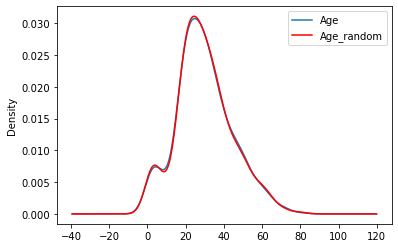

In [47]:
fig = plt.figure()
ax =  fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##The distribution seems very much same as Age

## Advantages

1. Easy to implement
2. No distortion in variance

## Disadvantages
1. In every situation RAndomness wont work